In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
#To assign numbers to the possibilities for binary classification
df['label'] = df['label'].map({'ham':0, 'spam':1})

#To remove punctuations for better model understanding
def clean_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\s+', ' ', text)
  return text
df['message'] = df['message'].apply(clean_text)
print(df['message'].head())

#Splitting data
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

#vectorizing and removing stop words from the data
vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

#Training Naive Bayes Model for binary classification
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
df.head()

0    go until jurong point crazy available only in ...
1                             ok lar joking wif u oni 
2    free entry in 2 a wkly comp to win fa cup fina...
3         u dun say so early hor u c already then say 
4    nah i don t think he goes to usf he lives arou...
Name: message, dtype: object


,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...


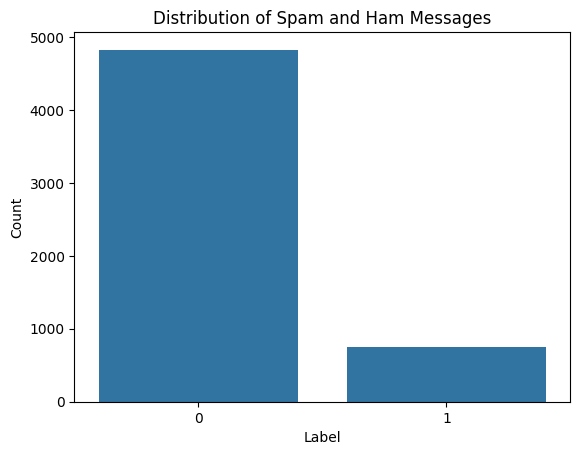

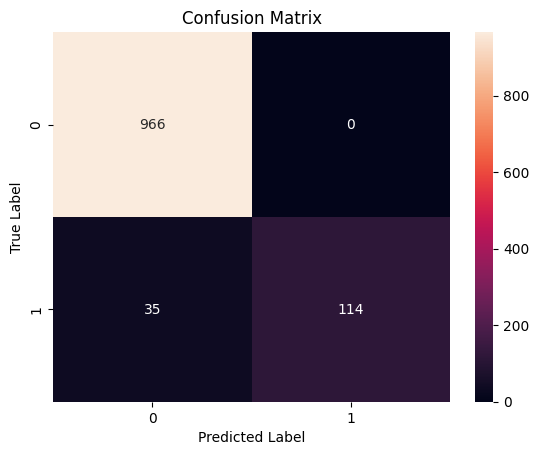

Accuracy: 0.968609865470852

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[966   0]
 [ 35 114]]

ROC AUC Score: 0.8825503355704698


In [ ]:
#To see the imbalance between ham and spam
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

#Gives a heatmap which tells the model prediction performance
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Accuracy score of the model 97%
print("Accuracy:", accuracy_score(y_test, y_pred))

#Gives the precision, recall, f1 and support score as a report of model analysis
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Tells the overall performance of the model with the data imbalance
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))
